In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
!pip install matplotlib seaborn

In [7]:
df = pd.read_csv("D:/Project X/creditcard.csv")

In [8]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [9]:
# Separate features and labels
X = df.drop(columns=["Class", "Time"])  # Optional: drop 'Time'
y = df["Class"]

In [10]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Model training (Random Forest as baseline)
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# Evaluation
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [33]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9580056030572047


In [12]:
# Save model & scaler
joblib.dump(model, "fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\n✅ Model and scaler saved.")


✅ Model and scaler saved.


In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)

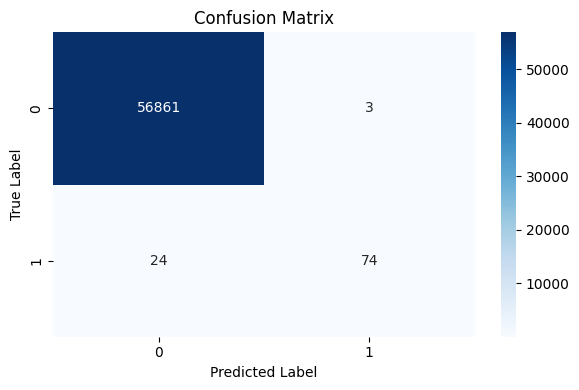

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("confusion_matrix.png")  # Save as image (optional)
plt.show()

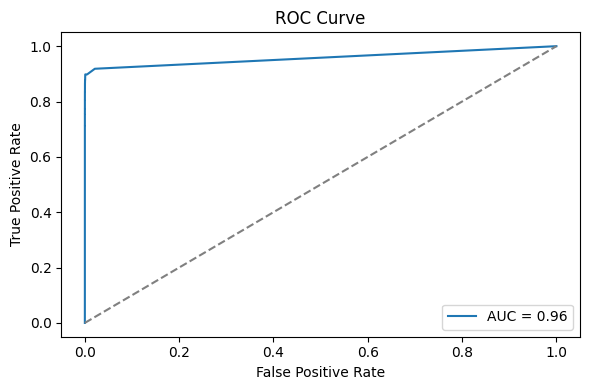

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.savefig("roc_curve.png")  # Save as image (optional)
plt.show()

V4: 0.149388990458647
V10: 0.14801142869774614
V14: 0.13848740526403905
V12: 0.09165148216300541
V11: 0.08742768401682086
V17: 0.06009172872207028
V7: 0.04649026616726606
V3: 0.04612201027327618
V16: 0.03747057030420282
V2: 0.017205981798219572
V21: 0.01456864393794946
V18: 0.014229882397359922
Amount: 0.012693163204828184
V19: 0.012582619944183021
V9: 0.011732502097710186
V20: 0.011724073705977615
V8: 0.011096715096848432
V5: 0.010605744179590466
V26: 0.010247073645351839
V13: 0.008919893989505608
V6: 0.008836787948376858
V27: 0.00844876069295576
V28: 0.0070838457020835745
V1: 0.006976423958226384
V22: 0.006328474995480691
V25: 0.006180366477627118
V15: 0.00598639141761045
V23: 0.005520398361452423
V24: 0.003890690381588829


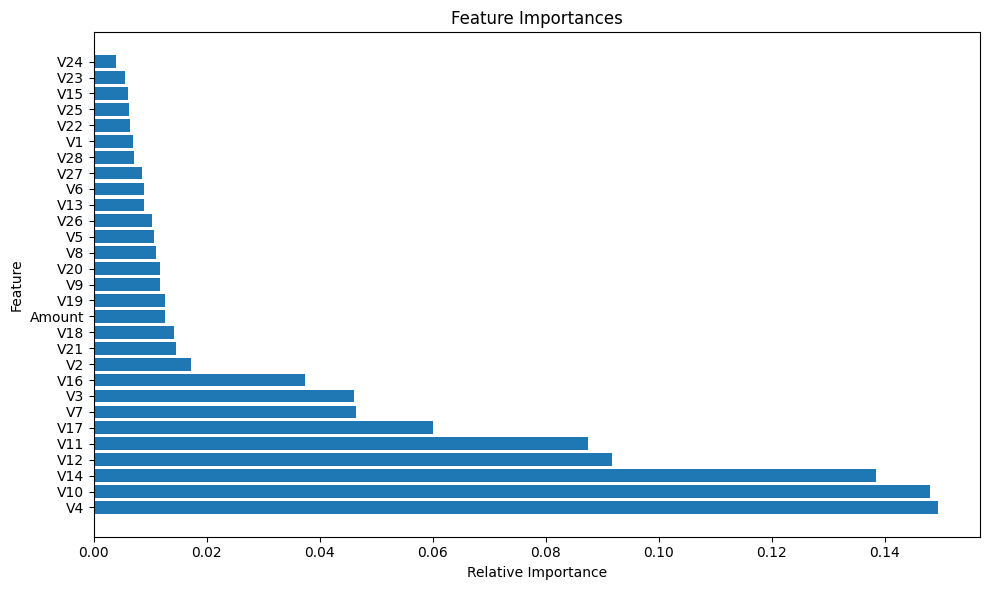

In [10]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
model = joblib.load('fraud_model.pkl')
scaler = joblib.load('scaler.pkl')

df=pd.read_csv("D:/Project X/creditcard.csv")

df = df.drop(columns=["Time"])

X = df.drop("Class", axis=1)
y = df["Class"]

X_scaled = scaler.transform(X)

importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

for i in range(len(importances)):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), feature_names[indices])
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("Feature_importance.png")
plt.show()

In [12]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 7.4 MB/s eta 0:00:21
   - -------------------------------------- 4.5/150.0 MB 19.7 MB/s eta 0:00:08
   - -------------------------------------- 4.7/150.0 MB 10.2 MB/s eta 0:00:15
   - -------------------------------------- 6.3/150.0 MB 8.4 MB/s eta 0:00:18
   - -------------------------------------- 6.8/150.0 MB 7.6 MB/s eta 0:00:19
   -- ------------------------------------- 7.6/150.0 MB 6.8 MB/s eta 0:00:22
   -- ------------------------------------- 8.4/150.0 MB 6.1 MB/s eta 0:00:24
   -- ------------------------------------- 9.2/150.0 MB 5.8 MB/s eta 0:00:25
   -- ------------------------------------- 10.0/150.0 MB 5.5 MB/s eta 0:00:26
   -- ------------------------------------- 10.7/150.0 MB 5.3 MB/s eta 0:00:27
   --- ------------------------------------ 11.5/150.0 MB 5.1 MB/s eta 0:00:27
   --- ------------------------------------ 12.1/150.0 MB 5.0 MB/s

In [4]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [14]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_model = XGBClassifier(
    n_estimators = 100,
    scale_pos_weight = scale_pos_weight,
    use_label_encoder = False,
    eval_metric = 'logloss',
    random_state = 42
)
xgb_model.fit(X_train_scaled, y_train)

D:\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:55:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [18]:
#evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("\n XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))


 XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost ROC AUC Score: 0.9691232500315826


In [29]:
joblib.dump(xgb_model, "xgb_fraud_model.pkl")

['xgb_fraud_model.pkl']

In [34]:
print("RandomForest ROC AUC:", roc_auc_score(y_test, y_proba))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

RandomForest ROC AUC: 0.9580056030572047
XGBoost ROC AUC: 0.9691232500315826


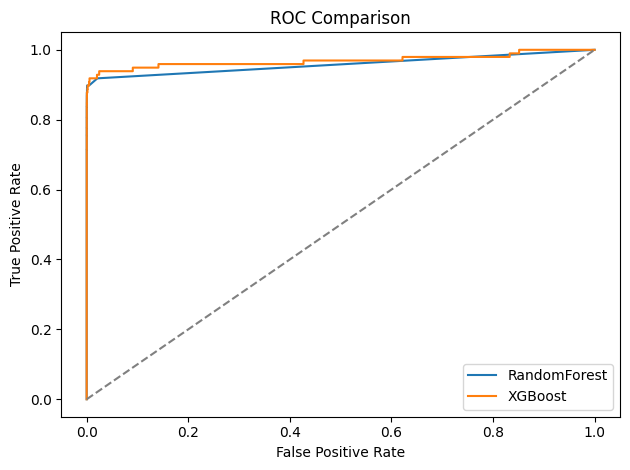

<Figure size 640x480 with 0 Axes>

In [19]:
fpr1, tpr1, _ = roc_curve(y_test, y_proba)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_xgb)

plt.figure()
plt.plot(fpr1, tpr1, label='RandomForest')
plt.plot(fpr2, tpr2, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("ROC_comparison.png")

In [38]:
with open("model_report.txt", "w") as f:
    f.write("RandomForest ROC AUC: {:.4f}\n".format(roc_auc_score(y_test, y_proba)))
    f.write("XGBoost ROC AUC: {:.4f}\n".format(roc_auc_score(y_test, y_proba_xgb)))